In [3]:
'''일반인 데이터프레임 불러오기'''

import pandas as pd

iw = pd.read_csv('data/걷기실천율_성_연령별__20250126072544.csv', encoding = 'cp949')
iw

,성별(1),연령별(1),2020,2020.1,2021,2021.1,2022,2022.1
0,성별(1),연령별(1),자료수 (명),분율 (%),자료수 (명),분율 (%),자료수 (명),분율 (%)
1,전체,30-39세,733,37.6,623,35.3,611,39.6
2,전체,40-49세,916,35.1,910,39.0,801,36.3
3,전체,50-59세,1011,36.3,971,36.8,838,41.1
4,전체,60-69세,1049,42.4,1054,45.2,1061,43.0
5,전체,70세 이상,910,39.9,1089,42.3,959,43.5


In [6]:
'''데이터 전처리'''

# 1. 첫 번째 행 제거 (헤더 설명 행 제거) 및 복사본 생성
iw = iw.iloc[1:].copy()

# 2. 컬럼명 변경
iw.columns = [
    '성별', '연령대', 
    '2020_응답자수', '2020_분율', 
    '2021_응답자수', '2021_분율', 
    '2022_응답자수', '2022_분율'
]

# 3. 숫자 데이터로 변환 (쉼표 제거 후 숫자로 변환)
numeric_cols = [col for col in iw.columns if '응답자수' in col or '분율' in col]
for col in numeric_cols:
    iw[col] = iw[col].str.replace(',', '')  # 쉼표 제거
    iw[col] = pd.to_numeric(iw[col], errors='coerce')  # 숫자로 변환

# 4. 연도별 응답자수 합산 및 분율 가중평균 계산
weighted_mean_percentages = {}
for year in ['2020', '2021', '2022']:
    respondents_col = f'{year}_응답자수'
    percentage_col = f'{year}_분율'
    
    # 가중평균 계산
    weighted_mean_percentages[year] = (
        (iw[respondents_col] * iw[percentage_col]).sum() /
        iw[respondents_col].sum()
    )

# 5. 결과 데이터프레임 생성
iw_j = pd.DataFrame({
    '연도': list(weighted_mean_percentages.keys()),
    '응답자수 합산': [iw[f'{year}_응답자수'].sum() for year in weighted_mean_percentages.keys()],
    '분율 가중평균': list(weighted_mean_percentages.values())
})

# 6. 소수점 둘째 자리로 제한
iw_j['분율 가중평균'] = iw_j['분율 가중평균'].round(2)

# 결과 확인
iw_j


,연도,응답자수 합산,분율 가중평균
0,2020,4619,38.36
1,2021,4647,40.22
2,2022,4270,41.00


In [7]:
'''당뇨환자 데이터프레임 불러오기'''

import pandas as pd

dw = pd.read_csv('data/시·도별_당뇨병_진단_경험자_30세_이상_의_걷기_실천율_20250126072434.csv', encoding = 'cp949')
dw

,시도별(1),2020,2020.1,2021,2021.1,2022,2022.1,2023,2023.1,2024,2024.1
0,시도별(1),응답자수 (명),표준화율 (%),응답자수 (명),표준화율 (%),응답자수 (명),표준화율 (%),응답자수 (명),표준화율 (%),응답자수 (명),표준화율 (%)
1,서울특별시,2286,50.7,2242,53.6,2595,57.8,2546,59.7,2684,62.9
2,부산광역시,1602,36.5,1713,45.0,1881,49.8,1952,50.4,1962,55.7
3,대구광역시,732,43.9,785,42.3,879,45.7,1002,45.8,1005,46.9
4,인천광역시,1052,46.1,1144,47.0,1228,50.6,1295,51.2,1317,51.6
5,광주광역시,422,38.5,444,49.2,500,47.0,491,41.7,524,53.7
6,대전광역시,400,38.9,473,43.4,520,50.2,547,46.7,539,49.6
7,울산광역시,431,40.4,445,38.5,462,47.8,453,45.1,500,52.7
8,세종특별자치시,85,30.1,68,42.1,70,72.3,108,52.4,106,43.1
9,경기도,4058,41.5,4294,43.9,4929,48.3,5017,48.8,5197,49.5


In [14]:
''' 데이터 전처리'''

# 1. 첫 번째 행 제거 (헤더 설명 행 제거) 및 복사본 생성
dw = dw.iloc[1:].copy()

# 2. 실제 컬럼 이름 확인
print("현재 컬럼 이름:", dw.columns)
print("현재 컬럼 수:", len(dw.columns))

# 3. 컬럼명 변경 (컬럼 수를 11개로 맞춤)
dw.columns = [
    '시도별', 
    '2020_응답자수', '2020_분율', 
    '2021_응답자수', '2021_분율', 
    '2022_응답자수', '2022_분율', 
    '2023_응답자수', '2023_분율', 
    '2024_응답자수', '2024_분율'
]

# 4. 2023, 2024년도 데이터 제거
dw = dw.drop(columns=['2023_응답자수', '2023_분율', '2024_응답자수', '2024_분율'])

# 5. 숫자 데이터로 변환 (쉼표 제거 후 숫자로 변환)
numeric_cols = [col for col in dw.columns if '응답자수' in col or '분율' in col]
for col in numeric_cols:
    dw[col] = dw[col].str.replace(',', '')  # 쉼표 제거
    dw[col] = pd.to_numeric(dw[col], errors='coerce')  # 숫자로 변환

# 6. 연도별 응답자수 합산 및 분율 가중평균 계산
weighted_mean_percentages = {}
for year in ['2020', '2021', '2022']:
    respondents_col = f'{year}_응답자수'
    percentage_col = f'{year}_분율'
    
    # 가중평균 계산
    weighted_mean_percentages[year] = (
        (dw[respondents_col] * dw[percentage_col]).sum() /
        dw[respondents_col].sum()
    )

# 7. 결과 데이터프레임 생성
dw_j = pd.DataFrame({
    '연도': list(weighted_mean_percentages.keys()),
    '응답자수 합산': [dw[f'{year}_응답자수'].sum() for year in weighted_mean_percentages.keys()],
    '분율 가중평균': list(weighted_mean_percentages.values())
})

# 8. 소수점 둘째 자리로 제한
dw_j['분율 가중평균'] = dw_j['분율 가중평균'].round(2)

# 결과 확인
dw_j


현재 컬럼 이름: Index(['시도별(1)', '2020', '2020.1', '2021', '2021.1', '2022', '2022.1', '2023',
       '2023.1', '2024', '2024.1'],
      dtype='object')
현재 컬럼 수: 11


,연도,응답자수 합산,분율 가중평균
0,2020,26707,39.77
1,2021,28344,41.08
2,2022,30775,45.19


In [16]:
''' 2개의 데이터 병합'''

import pandas as pd

# 데이터 병합
idw = pd.merge(iw_j, dw_j, on='연도', how='outer', suffixes=('_일반인', '_당뇨환자'))

# 결과 확인
print(idw)


     연도  응답자수 합산_일반인  분율 가중평균_일반인  응답자수 합산_당뇨환자  분율 가중평균_당뇨환자
0  2020         4619        38.36         26707         39.77
1  2021         4647        40.22         28344         41.08
2  2022         4270        41.00         30775         45.19


In [34]:
'''시각화'''

import matplotlib.pyplot as plt

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

# 시각화 및 저장 함수
def draw_and_save_walking_bar_graph(idw, filename):
    plt.figure(figsize=(10, 9))
    bar_width = 0.35
    x = range(len(idw['연도']))
    
    # 일반인 걷기 실천율 막대
    bars1 = plt.bar([p - bar_width / 2 for p in x], idw['분율 가중평균_일반인'], 
                    width=bar_width, color='#4CAF50', label='일반인', alpha=0.8)
    
    # 당뇨환자 걷기 실천율 막대
    bars2 = plt.bar([p + bar_width / 2 for p in x], idw['분율 가중평균_당뇨환자'], 
                    width=bar_width, color='#FF5722', label='당뇨환자', alpha=0.8)
    
    # 각 막대 위에 값 표시
    for bar in bars1:
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, 
                 f'{bar.get_height():.2f}', ha='center', fontsize=10, color='black')
    for bar in bars2:
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, 
                 f'{bar.get_height():.2f}', ha='center', fontsize=10, color='black')
    
    # 축, 제목 설정
    plt.xticks(x, idw['연도'], fontsize=12)
    plt.xlabel('연도', fontsize=14, fontweight='bold')
    plt.ylabel('걷기 실천율 (%)', fontsize=14, fontweight='bold')
    plt.title('일반인 vs 당뇨환자 걷기실천율 비교', fontsize=16, fontweight='bold')
    
    # y축 최대값 조정
    plt.ylim(0, max(idw['분율 가중평균_일반인'].max(), idw['분율 가중평균_당뇨환자'].max()) + 2)
    
    # 범례를 그래프 아래로 이동
    plt.legend(fontsize=12, loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2)
    
    # 그리드 및 레이아웃
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    
    # 그래프 저장
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()




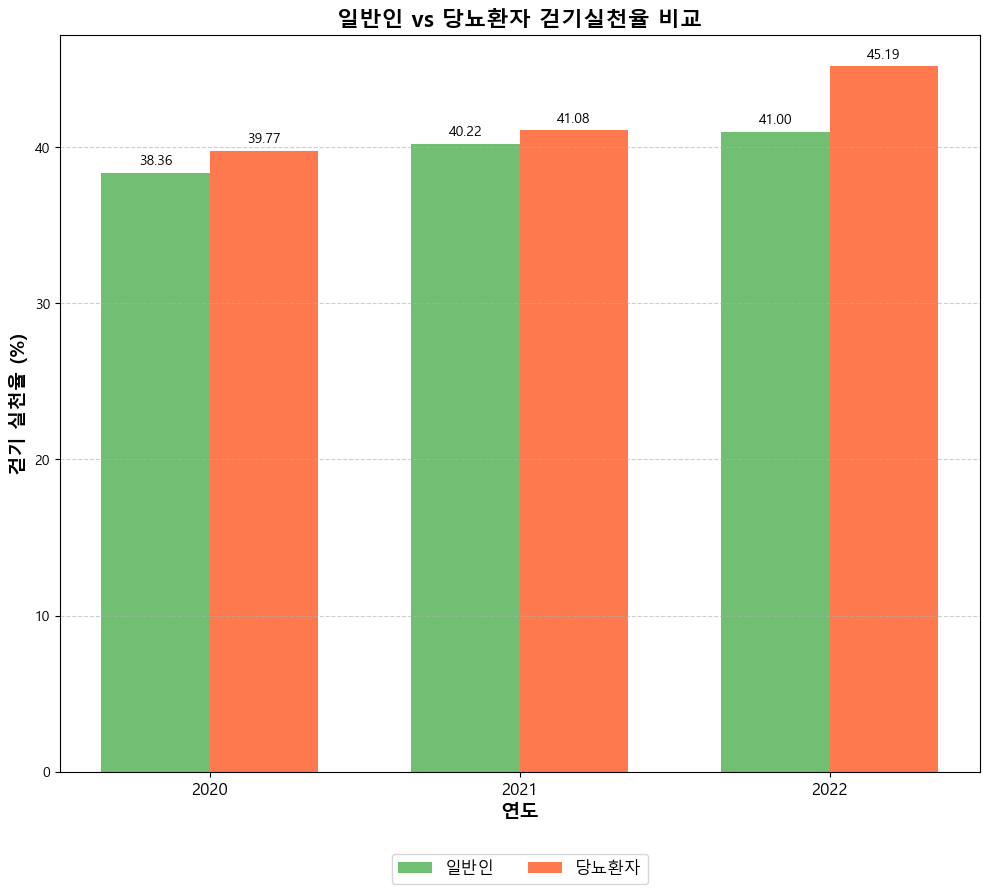

In [35]:
# 함수 실행 (예: 그래프를 'walking_comparison.png'로 저장)
draw_and_save_walking_bar_graph(idw, 'walking_comparison.png')